# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# We will import the file from the Exil (spreadsheet).
data = pd.read_csv("Wholesale customers data.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
data.shape

(440, 8)

In [5]:
# We are looking for duplicate rows.
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
# We are looking for types of the columns in the data.
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

# DBscan

In [9]:
x = data.loc[:, ['Milk', 'Grocery']].values

In [10]:
from sklearn.neighbors import NearestNeighbors 
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(x) 
distances,indices=nbrs.kneighbors(x)

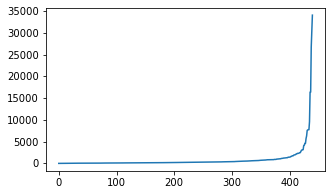

In [11]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances) 
plt.show()

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x)
labels = dbscan.labels_

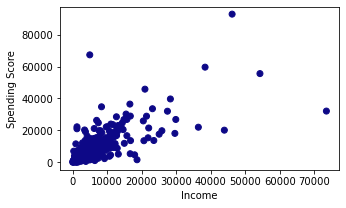

In [13]:
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") 
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()